<a href="https://colab.research.google.com/github/datajoedata/e-Commerce-Sales-Analysis-Target-Brazil/blob/main/An%C3%A1lise_explorat%C3%B3ria_vendas_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de E-commerce (Target)

# I - Montagem do drive e carregamento dos dados:

In [ ]:
!pip install contextily

In [ ]:
from google.colab import drive
from zipfile import ZipFile
import os
import pandas as pd
from IPython.display import display
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Descompacta arquivos

zip_path = '/content/drive/MyDrive/Analise_de_Vendas_E-commerce/archive (2).zip'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Lista arquivos descompactados
files = os.listdir('/content/')
print(files)


['.config', 'geolocation.csv', 'products.csv', 'sellers.csv', 'order_items.csv', 'payments.csv', 'customers.csv', 'orders.csv', 'drive', 'sample_data']


In [ ]:
clientes_df = pd.read_csv('/content/customers.csv')
vendedores_df = pd.read_csv('/content/sellers.csv')
itens_pedidos_df = pd.read_csv('/content/order_items.csv')
geolocalizacao_df = pd.read_csv('/content/geolocation.csv')
pagamentos_df = pd.read_csv('/content/payments.csv')
pedidos_df = pd.read_csv('/content/orders.csv')
produtos_df = pd.read_csv('/content/products.csv')

# II - Limpeza dos dados

 Os seguintes passos foram empregados para cada DataFrame:
- **Passo 1:** Utilizar os métodos head() e tail() para visualizar as primeiras e últimas linhas.
- **Passo 2:** Verificar os tipos de dados usando df.info().
- **Passo 3:** Analisar os tipos de dados e converter conforme necessário.
- **Passo 4:** Tratar valores nulos (se existirem).
- **Passo 5:** Padronizar dados categóricos (e.g., transformar texto em minúsculas, remover espaços extras).

In [ ]:
pd.set_option('display.max_rows', 5)

## 2.1 - Limpeza clientes

### 2.1.1 - Usando .head() e .tail()

head()

In [ ]:
# Exibir as primeiras linhas de um DataFrame
def mostrar_head(df, nome_df):
    print(f'Primeiras linhas do DataFrame {nome_df}:')
    display(df.head())
    print('\n')

In [ ]:
mostrar_head(clientes_df, 'clientes_df')

Primeiras linhas do DataFrame clientes_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


.tail()

In [ ]:
clientes_df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.2 - Usando .info()

In [ ]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### 2.1.3 - Remoção de duplicatas


In [ ]:
def remover_duplicatas(df, coluna):
    linhas_antes = len(df)

    df_sem_duplicatas = df.drop_duplicates(subset=coluna, keep='first')

    linhas_depois = len(df_sem_duplicatas)

    linhas_removidas = linhas_antes - linhas_depois
    print(f'\nTotal de linhas removidas com base na coluna "{coluna}": {linhas_removidas}')

    return df_sem_duplicatas

In [ ]:
remover_duplicatas(clientes_df, 'customer_unique_id')


Total de linhas removidas com base na coluna "customer_unique_id": 3345


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
...,...,...,...,...,...
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


### 2.1.4 - Conversão Tipos de Dados

Converter a coluna 'customer_zip_code_prefix' para string


In [ ]:
clientes_df['customer_zip_code_prefix'] = clientes_df['customer_zip_code_prefix'].astype(str)

Verifica alterações


In [ ]:
print(clientes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None


### 2.1.5 - Padronização

Remover espaços em branco no início e no final para todas as colunas


In [ ]:
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.2 - Limpeza vendedores

Usando .head() e .tail()

In [ ]:
mostrar_head(vendedores_df, 'vendedores_df')

Primeiras linhas do DataFrame vendedores_df:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
vendedores_df.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


Usando .info

In [ ]:
vendedores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


Remoção de duplicatas pela coluna id

In [ ]:
vendedores_df = remover_duplicatas(vendedores_df, 'seller_id')


Total de linhas removidas com base na coluna "seller_id": 0


Conversão tipo de dados

In [ ]:
vendedores_df['seller_zip_code_prefix'] = vendedores_df['seller_zip_code_prefix'].astype(str)

Padronização

In [ ]:
# Remove espaços no começo e no final das strings
clientes_df = clientes_df.apply(lambda x: x.str.strip())

## 2.3 - Limpeza itens_pedidos

In [ ]:
mostrar_head(itens_pedidos_df, 'itens_pedidos_df')

Primeiras linhas do DataFrame itens_pedidos_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
itens_pedidos_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


Usando .info()

In [ ]:
itens_pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Remoção de duplicatas

In [ ]:
itens_pedidos_df = remover_duplicatas(itens_pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 13984


Conversão Tipos de dados

Converter 'order_item_id' para string


In [ ]:
print(itens_pedidos_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [ ]:
itens_pedidos_df['order_item_id'] = itens_pedidos_df['order_item_id'].astype(str)

<ipython-input-191-23a03ceae791>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itens_pedidos_df['order_item_id'] = itens_pedidos_df['order_item_id'].astype(str)


Converter 'shipping_limit_date' para datetime


In [ ]:
itens_pedidos_df['shipping_limit_date'] = pd.to_datetime(itens_pedidos_df['shipping_limit_date'], errors='coerce')

## 2.4 - Limpeza geolocalização

Usando .head() e .info()

In [ ]:
mostrar_head(geolocalizacao_df, 'geolocalizacao_df')

Primeiras linhas do DataFrame geolocalizacao_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocalizacao_df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


Usando .info

In [ ]:
geolocalizacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Conversão tipos de dados

In [ ]:
# Converte 'geolocation_zip_code_prefix' para string
geolocalizacao_df['geolocation_zip_code_prefix'] = geolocalizacao_df['geolocation_zip_code_prefix'].astype(str)

Padronização

In [ ]:
# Remover espaços no início e no final de todas as colunas do tipo string
geolocalizacao_df = geolocalizacao_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.5 - Limpeza pagamentos

Usando .head() e .tail()

In [ ]:
mostrar_head(pagamentos_df, 'pagamentos_df')

Primeiras linhas do DataFrame pagamentos_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
pagamentos_df.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,UPI,1,191.58


Usando .info()

In [ ]:
pagamentos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
pagamentos_df = remover_duplicatas(pagamentos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 4446


Padronização

In [ ]:
pagamentos_df = pagamentos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

pagamentos_df['payment_type'] = pagamentos_df['payment_type'].str.lower()

## 2.6 - Limpeza pedidos

Usando .head() e .tail()

In [ ]:
mostrar_head(pedidos_df, 'pedidos_df')

Primeiras linhas do DataFrame pedidos_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
pedidos_df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


Usando .info()

In [ ]:
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


Remoção de duplicatas

In [ ]:
pedidos_df = remover_duplicatas(pedidos_df, 'order_id')


Total de linhas removidas com base na coluna "order_id": 0


Conversão tipo de dados

In [ ]:
# Converter colunas de data para o tipo datetime
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')
pedidos_df['order_delivered_carrier_date'] = pd.to_datetime(pedidos_df['order_delivered_carrier_date'], errors='coerce')
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

Padronização

In [ ]:
pedidos_df = pedidos_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

## 2.7 - Limpeza produtos

Usando .head() e tail()

In [ ]:
mostrar_head(produtos_df, 'produtos_df')

Primeiras linhas do DataFrame produtos_df:


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_density_g_per_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.100446
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,0.092593
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.063374
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,0.137204
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.141403


In [ ]:
produtos_df.tail()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_density_g_per_cm3
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0,0.192188
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0,0.349507
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0,0.274348
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0,0.086849
32950,106392145fca363410d287a815be6de4,bed table bath,58.0,309.0,1.0,2083.0,12.0,2.0,7.0,168.0,12.398810


Usando .info()

In [ ]:
produtos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32945 entries, 0 to 32950
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32945 non-null  object 
 1   product category            32336 non-null  object 
 2   product_name_length         32336 non-null  float64
 3   product_description_length  32336 non-null  float64
 4   product_photos_qty          32336 non-null  float64
 5   product_weight_g            32945 non-null  float64
 6   product_length_cm           32945 non-null  float64
 7   product_height_cm           32945 non-null  float64
 8   product_width_cm            32945 non-null  float64
 9   product_volume_cm3          32945 non-null  float64
 10  product_density_g_per_cm3   32945 non-null  float64
dtypes: float64(9), object(2)
memory usage: 3.0+ MB


Remoção de duplicatas

In [ ]:
produtos_df = remover_duplicatas(produtos_df, 'product_id')


Total de linhas removidas com base na coluna "product_id": 0


Padronização

In [ ]:
produtos_df['product category'] = produtos_df['product category'].str.lower().str.strip()

# III - Panorama Geral das Entregas

## 3.1 - Primeira e ultima data de entrega

In [ ]:
# Encontrar a primeira e a última data na amostra
primeira_data = pedidos_df['order_delivered_customer_date'].min()
ultima_data = pedidos_df['order_delivered_customer_date'].max()

print(f"A primeira data de entrega na amostra é: {primeira_data}")
print(f"A última data de entrega na amostra é: {ultima_data}")

A primeira data de entrega na amostra é: 2016-10-11 13:46:32
A última data de entrega na amostra é: 2018-10-17 13:22:46


As entregas na amostra variam de 11 de outubro de 2016 a 17 de outubro de 2018, indicando um período de quase dois anos de registros.

## 3.2 - Pedidos por Mês e Taxa de Crescimento Entre Períodos



In [ ]:
# Agrupar os pedidos por mês para contar o número de pedidos entregues
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Converter o período para uma data, para facilitar a visualização
pedidos_por_mes['order_delivered_customer_date'] = pedidos_por_mes['order_delivered_customer_date'].dt.to_timestamp()

# Identificar o pico de entregas (maior valor no período) e meses sem entregas (gaps)
pico_entrega = pedidos_por_mes['num_pedidos'].max()
gap_entrega = pedidos_por_mes[pedidos_por_mes['num_pedidos'] == 0].shape[0]

# Exibir a quantidade de pedidos por mês
for index, row in pedidos_por_mes.iterrows():
    print(f"Mês: {row['order_delivered_customer_date'].strftime('%Y-%m')}, Número de Pedidos: {row['num_pedidos']}")

# Exibir informações sobre picos e gaps
print(f"\nO maior pico de entregas em um mês foi de {pico_entrega} pedidos.")
print(f"Existem {gap_entrega} meses sem nenhuma entrega registrada.")

Mês: 2016-10, Número de Pedidos: 208
Mês: 2016-11, Número de Pedidos: 60
Mês: 2016-12, Número de Pedidos: 4
Mês: 2017-01, Número de Pedidos: 283
Mês: 2017-02, Número de Pedidos: 1351
Mês: 2017-03, Número de Pedidos: 2382
Mês: 2017-04, Número de Pedidos: 1849
Mês: 2017-05, Número de Pedidos: 3751
Mês: 2017-06, Número de Pedidos: 3223
Mês: 2017-07, Número de Pedidos: 3455
Mês: 2017-08, Número de Pedidos: 4302
Mês: 2017-09, Número de Pedidos: 3965
Mês: 2017-10, Número de Pedidos: 4494
Mês: 2017-11, Número de Pedidos: 4670
Mês: 2017-12, Número de Pedidos: 7205
Mês: 2018-01, Número de Pedidos: 6597
Mês: 2018-02, Número de Pedidos: 5850
Mês: 2018-03, Número de Pedidos: 6825
Mês: 2018-04, Número de Pedidos: 7850
Mês: 2018-05, Número de Pedidos: 7111
Mês: 2018-06, Número de Pedidos: 6829
Mês: 2018-07, Número de Pedidos: 5839
Mês: 2018-08, Número de Pedidos: 8314
Mês: 2018-09, Número de Pedidos: 56
Mês: 2018-10, Número de Pedidos: 3

O maior pico de entregas em um mês foi de 8314 pedidos.
Exist

### 3.2.1 - Tratando meses outliers
(Meses com menos de 300 pedidos)

In [ ]:
# Certificar que a coluna 'order_delivered_customer_date' está no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Calcular os meses válidos com base no número de pedidos (exemplo: meses com mais de 300 pedidos)
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

### 3.2.2 - Número de pedidos entregues no primeiro e último período analisado e sua taxa de crescimento.


Taxa de crescimento entre o primeiro e penúltimo mês: 515.40%


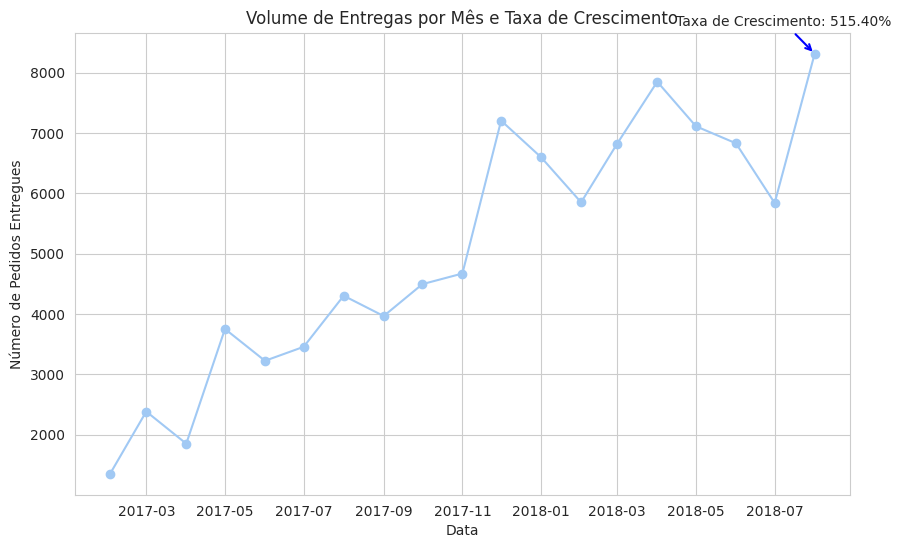

In [ ]:
# Agrupar os pedidos por mês usando o DataFrame já filtrado
pedidos_por_mes_filtrado = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Converter o período para uma data, para facilitar a visualização
pedidos_por_mes_filtrado['order_delivered_customer_date'] = pedidos_por_mes_filtrado['order_delivered_customer_date'].dt.to_timestamp()

# Calcular a taxa de crescimento das entregas entre a primeira e a última data
taxa_crescimento = (pedidos_por_mes_filtrado['num_pedidos'].iloc[-1] - pedidos_por_mes_filtrado['num_pedidos'].iloc[0]) / pedidos_por_mes_filtrado['num_pedidos'].iloc[0] * 100
print(f"Taxa de crescimento entre o primeiro e penúltimo mês: {taxa_crescimento:.2f}%")

# Criar o gráfico de linhas mostrando o número de pedidos entregues por mês
plt.figure(figsize=(10, 6))
plt.plot(pedidos_por_mes_filtrado['order_delivered_customer_date'], pedidos_por_mes_filtrado['num_pedidos'], marker='o')
plt.title('Volume de Entregas por Mês e Taxa de Crescimento')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos Entregues')
plt.grid(True)

# Adicionar a taxa de crescimento ao gráfico como anotação
plt.annotate(f'Taxa de Crescimento: {taxa_crescimento:.2f}%',
             xy=(pedidos_por_mes_filtrado['order_delivered_customer_date'].iloc[-1], pedidos_por_mes_filtrado['num_pedidos'].iloc[-1]),
             xytext=(-100, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', lw=1.5, color='blue'))

plt.show()


O volume de entregas apresentou um crescimento expressivo ao longo do período analisado, com um aumento de 515.4% do início ao final do período. Observa-se que o pico de entregas ocorreu em agosto de 2018, com 8314 pedidos, destacando uma expansão constante.

## 3.3 - Distribuição dos pedidos por tempo de entrega

### 3.3.1 - Calculando o tempo de entrega (dias entre a confirmação do pagamento e a entrega ao cliente)


### 3.3.2 - Tratando pedidos outliers para calcular tempos de entrega (Removendo Q1 e Q3)

In [ ]:
# Converter apenas as colunas necessárias para datetime
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'], errors='coerce')
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Calcular o tempo de entrega (dias entre a confirmação do pagamento e a entrega ao cliente)
pedidos_df['tempo_entrega'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_approved_at']).dt.days

# Calcular o 1º e 3º quartil (Q1 e Q3) e o IQR (Intervalo interquartílico)
Q1 = pedidos_df['tempo_entrega'].quantile(0.25)
Q3 = pedidos_df['tempo_entrega'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers do DataFrame e criar uma cópia
pedidos_sem_outliers_entregas = pedidos_df[(pedidos_df['tempo_entrega'] >= limite_inferior) & (pedidos_df['tempo_entrega'] <= limite_superior)].copy()

# Exibir o número de outliers removidos
outliers = pedidos_df[(pedidos_df['tempo_entrega'] < limite_inferior) | (pedidos_df['tempo_entrega'] > limite_superior)]
print(f"Número de outliers encontrados e removidos: {len(outliers)}")

# Exibir alguns outliers como exemplo
display(outliers[['order_id', 'tempo_entrega']].head(3))

Número de outliers encontrados e removidos: 4773


,order_id,tempo_entrega
29,ecab90c9933c58908d3d6add7c6f5ae3,30.0
35,8563039e855156e48fccee4d611a3196,30.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,33.0


### 3.3.3 - Tempo Médio de Aprovação e Transporte

In [ ]:
# Agora que as colunas estão no formato datetime, calcular o tempo de aprovação e transporte
pedidos_sem_outliers_entregas['tempo_aprovacao'] = (pedidos_sem_outliers_entregas['order_approved_at'] - pedidos_sem_outliers_entregas['order_purchase_timestamp']).dt.days

# Calcular tempo de transporte (dias entre a aprovação do pagamento e a entrega)
pedidos_sem_outliers_entregas['tempo_transporte'] = (pedidos_sem_outliers_entregas['order_delivered_customer_date'] - pedidos_sem_outliers_entregas['order_approved_at']).dt.days

# Exibir a média, mediana e desvio padrão após remover os outliers
media_aprovacao = round(pedidos_sem_outliers_entregas['tempo_aprovacao'].mean(), 1)
media_transporte = round(pedidos_sem_outliers_entregas['tempo_transporte'].mean(), 1)

print(f"Média do tempo de aprovação (sem outliers): {media_aprovacao} dias")
print(f"Média do tempo de transporte (sem outliers): {media_transporte} dias")

Média do tempo de aprovação (sem outliers): 0.3 dias
Média do tempo de transporte (sem outliers): 10.2 dias


### 3.3.4 - Gráfico da distribuição de densidade do tempo de entrega por pedido

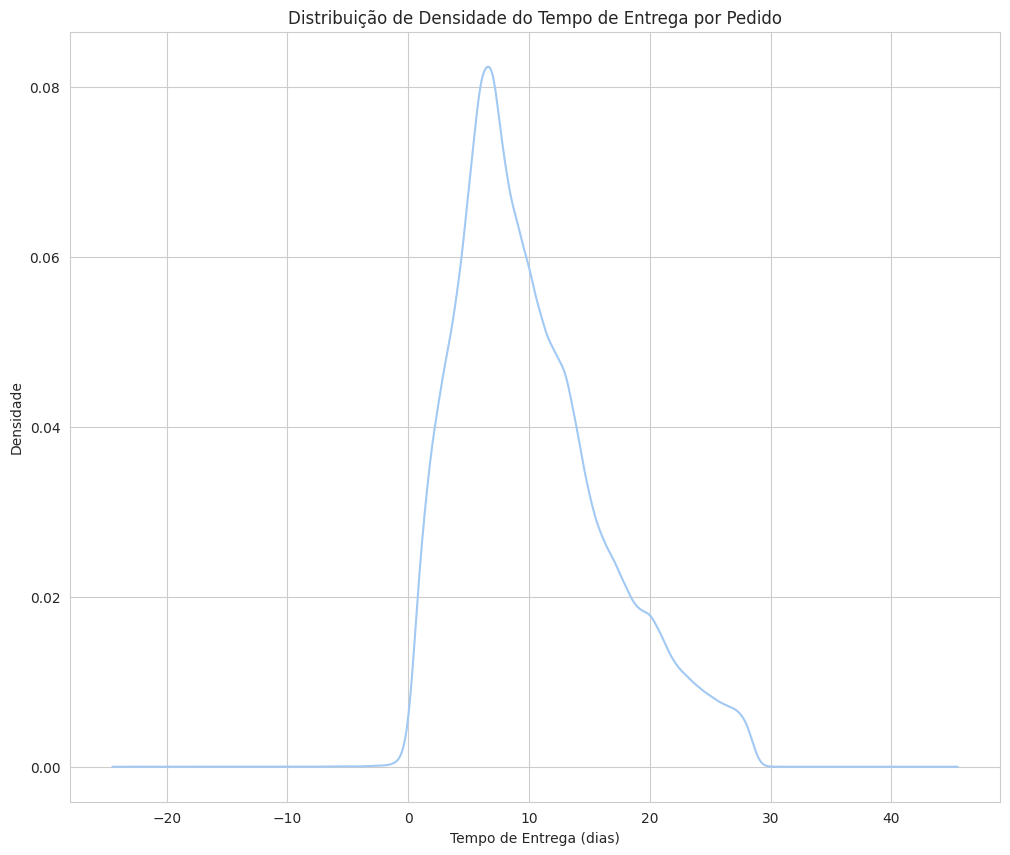

In [ ]:
# Gráfico de densidade para visualizar a distribuição do tempo de entrega
plt.figure(figsize=(12, 10))
pedidos_sem_outliers_entregas['tempo_entrega'].plot(kind='kde')
plt.title('Distribuição de Densidade do Tempo de Entrega por Pedido')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

A distribuição de densidade revela uma concentração significativa em torno de 5 a 10 dias de entrega.

### 3.3.5 - Histograma da distribuição do tempo de entrega por pedidos

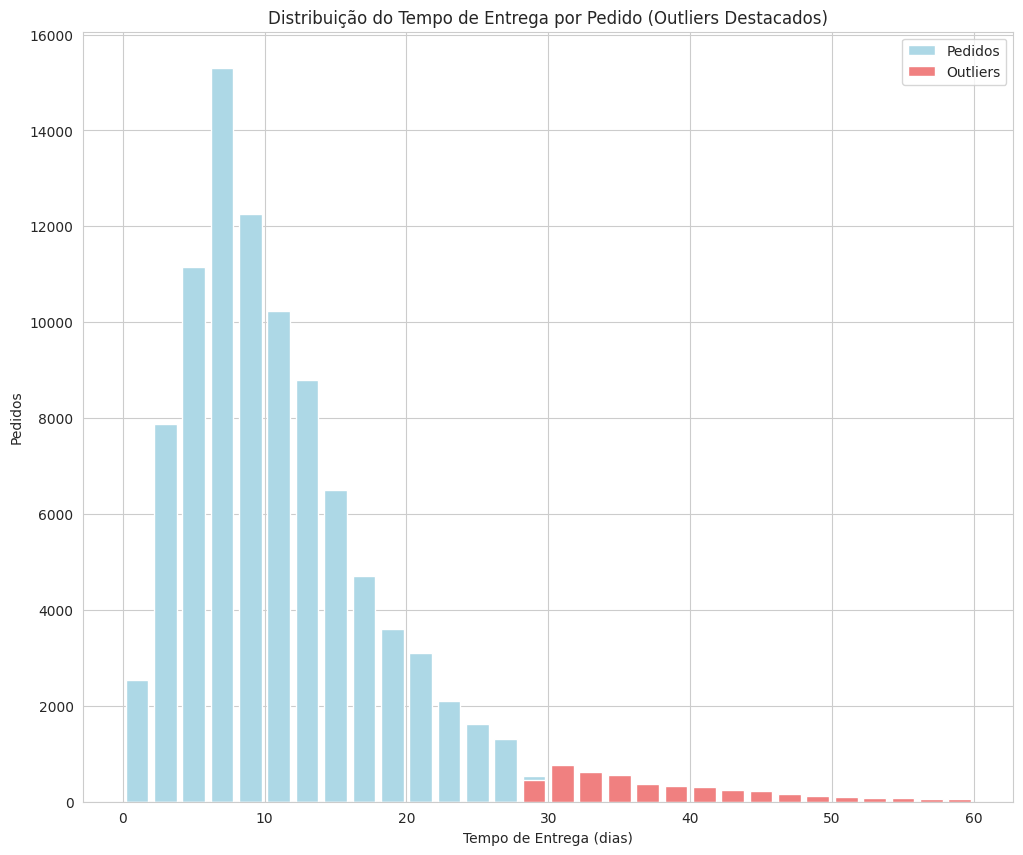

In [ ]:
# Plota histograma com outliers
plt.figure(figsize=(12, 10))
plt.hist(pedidos_sem_outliers_entregas['tempo_entrega'], bins=30, range=(0, 60), rwidth=0.8, color='lightblue', label='Pedidos')
plt.hist(outliers['tempo_entrega'], bins=30, range=(0, 60), rwidth=0.8, color='lightcoral', label='Outliers')

plt.title('Distribuição do Tempo de Entrega por Pedido (Outliers Destacados)')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Pedidos')
plt.legend()
plt.grid(True)
plt.show()

O histograma acima reforça que a maioria dos pedidos foi entregue dentro de um prazo aceitável. No entanto, é necessário investigar as causas dos pedidos que tiveram tempos de entrega significativamente mais longos.

# IV - Cobertura Geográfica das Entregas

## 4.1 - Pedidos por Estado

In [ ]:
if 'customer_state' not in pedidos_df.columns:
    pedidos_df = pedidos_df.merge(clientes_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Contar o número de pedidos por estado no DataFrame filtrado
pedidos_por_estado = pedidos_df.groupby('customer_state')['order_id'].count().reset_index(name='num_pedidos')

# Exibir os primeiros resultados
display(pedidos_por_estado.head(3))

,customer_state,num_pedidos
0,AC,81
1,AL,413
2,AM,148


### 4.1.1 - Gráfico de barras pedidos por Estado

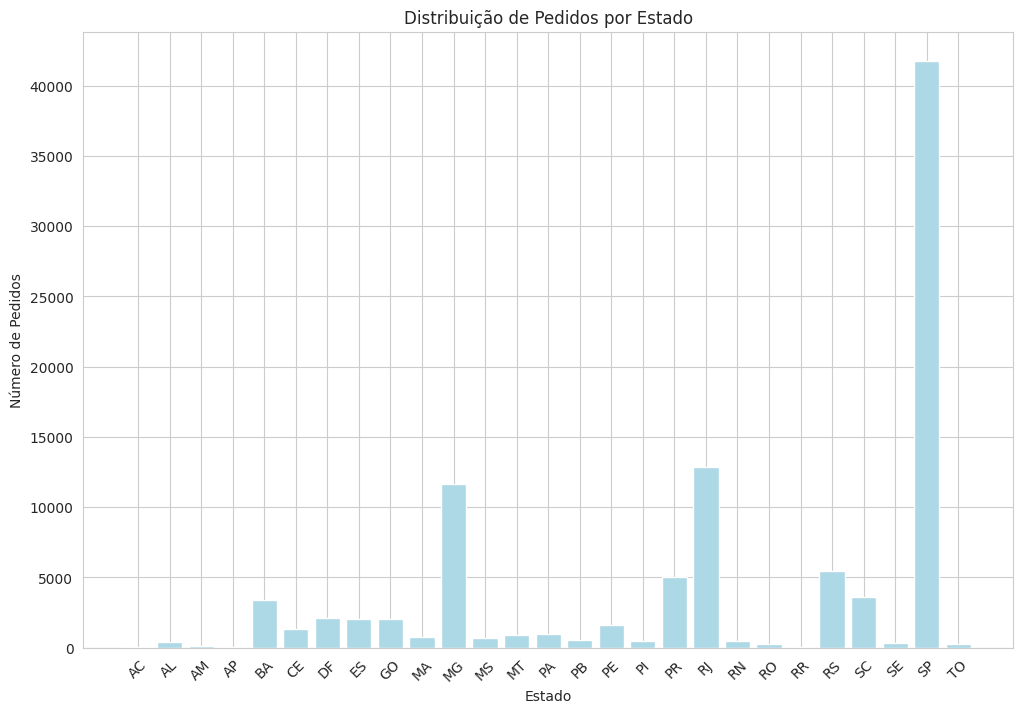

In [ ]:
# Plotar o gráfico de barras mostrando o número de pedidos por estado
plt.figure(figsize=(12, 8))
plt.bar(pedidos_por_estado['customer_state'], pedidos_por_estado['num_pedidos'], color='lightblue')
plt.title('Distribuição de Pedidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

São Paulo lidera em número de pedidos, seguido por Minas Gerais e Rio de Janeiro. Esses estados representam uma parte significativa da demanda, sugerindo um foco maior nessas regiões para otimizar a eficiência logística e atender à demanda.

## 4.2 - Ticket Médio por Estado


In [ ]:
# Fazer o merge entre pedidos_df e itens_pedidos_df para trazer a coluna 'price'
pedidos_com_valor = pedidos_df.merge(itens_pedidos_df[['order_id', 'price']], on='order_id', how='left')

# Calcular o valor médio dos pedidos por estado
valor_medio_pedidos_estado = pedidos_com_valor.groupby('customer_state')['price'].mean().reset_index(name='valor_medio_pedido')

### 4.2.1 - Gráfico de barras mostrando o Ticket Médio por estado

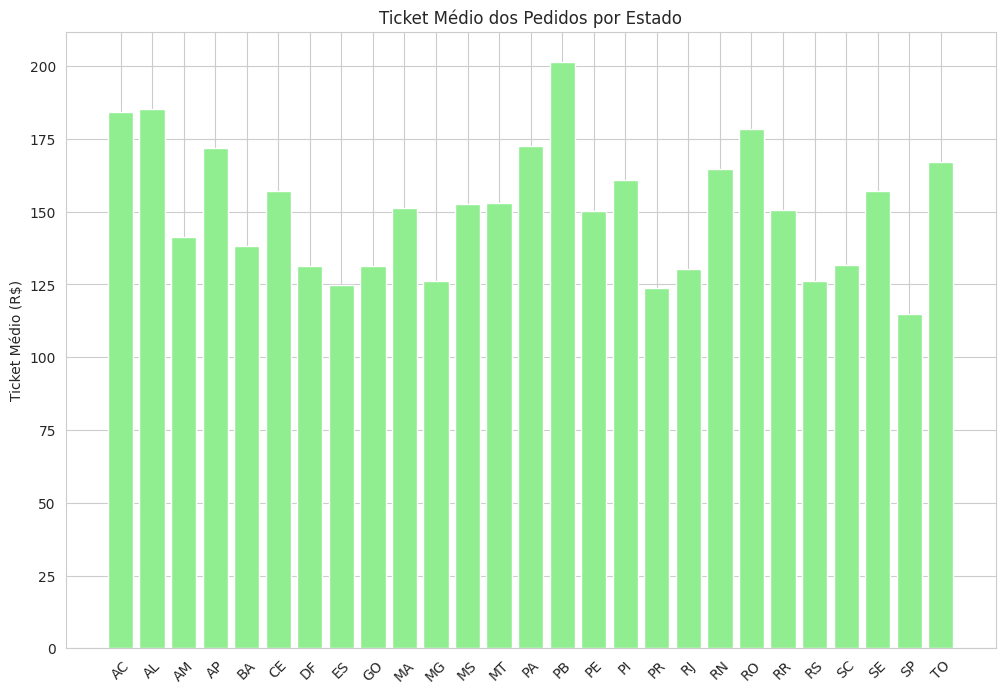

In [ ]:
# Plotar o gráfico de barras mostrando o valor médio dos pedidos por estado (ticket médio)
plt.figure(figsize=(12, 8))
plt.bar(valor_medio_pedidos_estado['customer_state'], valor_medio_pedidos_estado['valor_medio_pedido'], color='lightgreen')

# Adicionar título e rótulos
plt.title('Ticket Médio dos Pedidos por Estado')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)  # Girar os rótulos dos estados para melhor legibilidade
plt.grid(True)

# Exibir o gráfico
plt.show()

O ticket médio varia consideravelmente entre os estados. Estados com tickets médios mais altos, como a Paraíba, indicam maiores valores por pedido.

## 4.3 - Média de Tempo de Entrega por UF

In [ ]:
# Garantir que 'customer_state' esteja presente no DataFrame filtrado
if 'customer_state' not in pedidos_sem_outliers_entregas.columns:
    pedidos_sem_outliers_entregas = pedidos_sem_outliers_entregas.merge(clientes_df[['customer_id', 'customer_state']], on='customer_id', how='left')

# Calcular a média e o desvio padrão do tempo de entrega por estado
tempo_entrega_por_estado = pedidos_sem_outliers_entregas.groupby('customer_state')['tempo_entrega'].agg(['mean', 'std']).reset_index()
tempo_entrega_por_estado.columns = ['customer_state', 'media_tempo_entrega', 'desvio_padrao_tempo_entrega']

# Exibir os primeiros resultados
display(tempo_entrega_por_estado.head(3))

,customer_state,media_tempo_entrega,desvio_padrao_tempo_entrega
0,AC,16.885714,5.060626
1,AL,17.717314,5.660422
2,AM,19.136842,7.136377


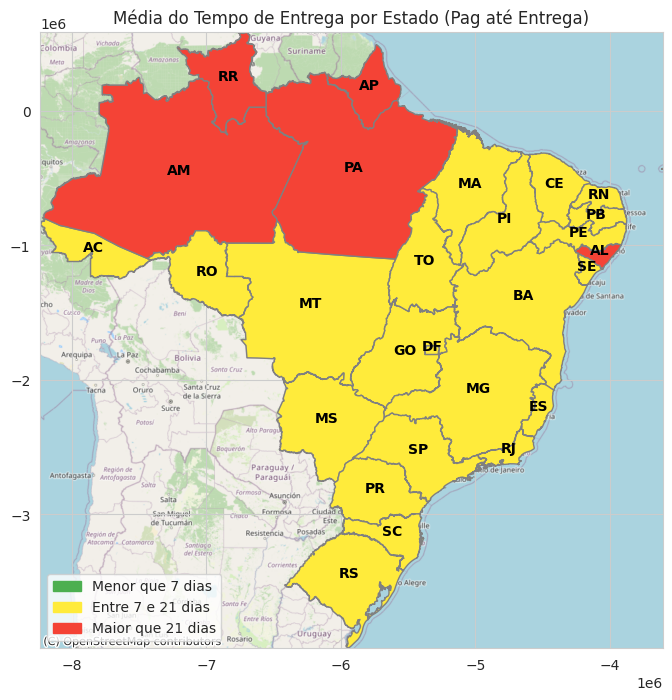

In [ ]:
# Carregar o shapefile dos estados do Brasil (GeoJSON)
brasil = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")


# Agrupar por estado e calcular a média do tempo de entrega por estado
media_tempo_entrega_por_estado = pedidos_df.groupby('customer_state')['tempo_entrega'].mean().reset_index()

# Unir os dados de tempo de entrega ao GeoDataFrame 'brasil'
brasil = brasil.merge(media_tempo_entrega_por_estado, left_on='sigla', right_on='customer_state', how='left')

# Função para definir a cor dos estados com base no tempo médio de entrega
def definir_cor(tempo_entrega):
    if pd.isna(tempo_entrega):
        return '#f5f5dc'  # Bege para estados sem dados
    elif tempo_entrega <= 7:
        return '#4caf50'  # Verde para entregas rápidas (até 7 dias)
    elif 7 < tempo_entrega <= 21:
        return '#ffeb3b'  # Amarelo para 7 a 21 dias
    else:
        return '#f44336'  # Vermelho para mais de 21 dias

# Aplicar a função para determinar a cor de cada estado
brasil['cor'] = brasil['tempo_entrega'].apply(definir_cor)

# Converter o shapefile para o sistema de coordenadas adequado
brasil = brasil.to_crs(epsg=3857)

# Definir os limites do mapa
bounds = brasil.total_bounds

# Plotar o mapa com as cores definidas
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
brasil.plot(ax=ax, color=brasil['cor'], edgecolor='gray')

# Adicionar o fundo de mapa
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)

# Limitar o mapa ao Brasil
ax.set_xlim([bounds[0], bounds[2]])
ax.set_ylim([bounds[1], bounds[3]])

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    estado_geom = row['geometry'].centroid
    ax.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold', color='black')

# Criar a legenda
import matplotlib.patches as mpatches
legenda = [
    mpatches.Patch(color='#4caf50', label='Menor que 7 dias'),
    mpatches.Patch(color='#ffeb3b', label='Entre 7 e 21 dias'),
    mpatches.Patch(color='#f44336', label='Maior que 21 dias')
]
ax.legend(handles=legenda, loc='lower left')

# Definir título e mostrar o mapa
plt.title('Média do Tempo de Entrega por Estado (Pag até Entrega)', fontsize=12)
plt.show()


Os estados do norte, como Amazonas e Pará, apresentam tempos de entrega significativamente maiores, provavelmente devido a desafios logísticos e infraestrutura limitada. Focar em melhorar a logística nessas regiões pode reduzir o tempo de entrega e aumentar a satisfação do cliente.

## 4.4 - Distribuição de Atrasos por Estado vs. Qtde pedidos por Estado

Definimos um pedido como "atrasado" quando o tempo de entrega ultrapassa a data estimada



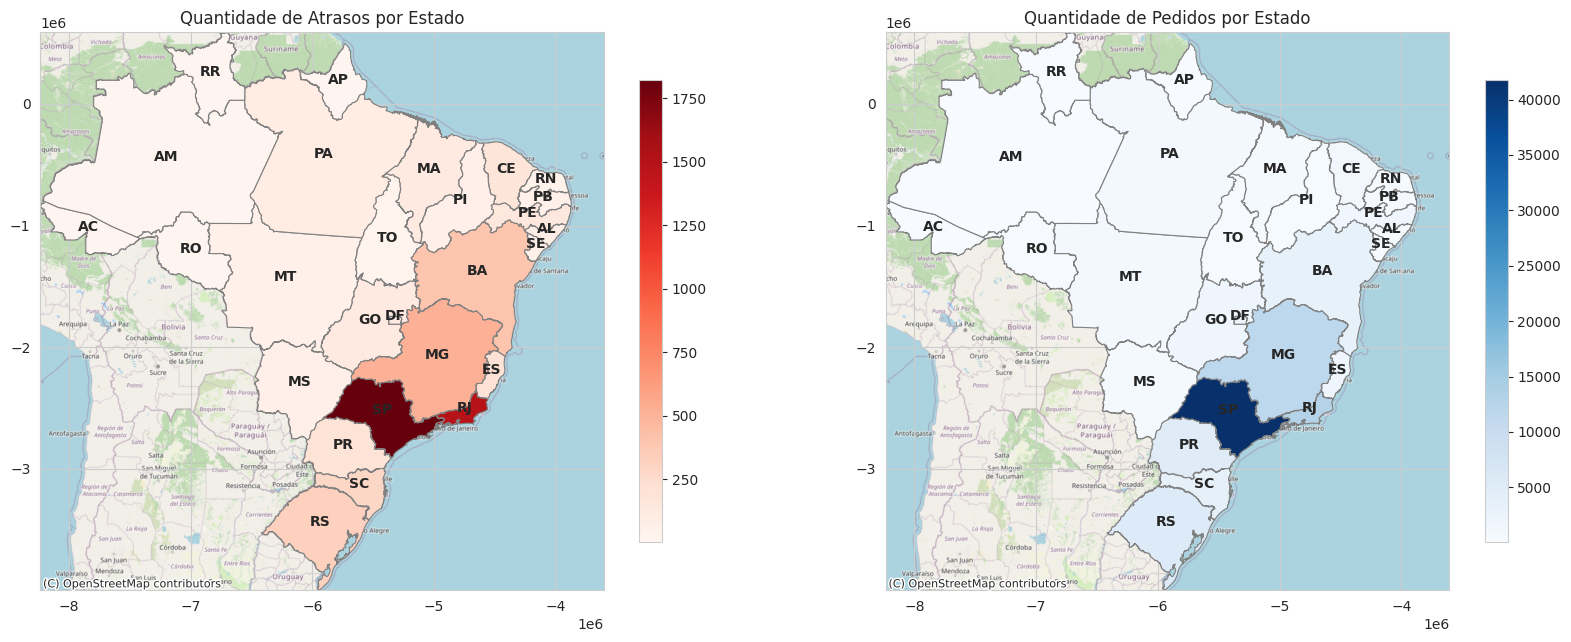

In [ ]:
# Certificar que as colunas de data estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

# Criar a coluna 'atraso_vs_estimativa' para calcular a diferença entre a data real e estimada
pedidos_df['atraso_vs_estimativa'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_estimated_delivery_date']).dt.days

# Filtrar os pedidos que tiveram atraso
pedidos_atrasados = pedidos_df[pedidos_df['atraso_vs_estimativa'] > 0]

# Agrupar o número de atrasos por estado
atrasos_por_estado = pedidos_atrasados.groupby('customer_state')['tempo_entrega'].count().reset_index()
atrasos_por_estado.columns = ['sigla', 'Quantidade de Atrasos']

# Agrupar o número de pedidos por estado
pedidos_por_estado = pedidos_df.groupby('customer_state')['order_id'].count().reset_index()
pedidos_por_estado.columns = ['sigla', 'Quantidade de Pedidos']

# Carregar o shapefile dos estados do Brasil (GeoJSON)
brasil = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Merge dos dados de atrasos e pedidos no GeoDataFrame
brasil = brasil.merge(atrasos_por_estado, on='sigla', how='left')
brasil = brasil.merge(pedidos_por_estado, on='sigla', how='left')

# Preencher valores NaN com 0 (para estados sem dados)
brasil['Quantidade de Atrasos'] = brasil['Quantidade de Atrasos'].fillna(0)
brasil['Quantidade de Pedidos'] = brasil['Quantidade de Pedidos'].fillna(0)

# Converter o shapefile para o sistema de coordenadas adequado
brasil = brasil.to_crs(epsg=3857)

# Definir os limites do mapa
bounds = brasil.total_bounds

# Criar subplots para os dois gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Plotar o mapa de atrasos
brasil.plot(column='Quantidade de Atrasos', ax=ax1, legend=True, cmap='Reds', edgecolor='gray', linewidth=0.8,
            legend_kwds={'shrink': 0.5})
ax1.set_xlim([bounds[0], bounds[2]])
ax1.set_ylim([bounds[1], bounds[3]])
ax1.set_title('Quantidade de Atrasos por Estado', fontsize=12)

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    if row['Quantidade de Atrasos'] > 0:
        estado_geom = row['geometry'].centroid
        ax1.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold')

# Plotar o mapa de pedidos
brasil.plot(column='Quantidade de Pedidos', ax=ax2, legend=True, cmap='Blues', edgecolor='gray', linewidth=0.8,
            legend_kwds={'shrink': 0.5})
ax2.set_xlim([bounds[0], bounds[2]])
ax2.set_ylim([bounds[1], bounds[3]])
ax2.set_title('Quantidade de Pedidos por Estado', fontsize=12)

# Adicionar os nomes dos estados no centro de cada estado
for idx, row in brasil.iterrows():
    if row['Quantidade de Pedidos'] > 0:
        estado_geom = row['geometry'].centroid
        ax2.text(estado_geom.x, estado_geom.y, row['sigla'], horizontalalignment='center', fontsize=10, fontweight='bold')

# Adicionar o fundo de mapa (background) nos dois gráficos
ctx.add_basemap(ax1, crs=brasil.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)
ctx.add_basemap(ax2, crs=brasil.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)

# Exibir os gráficos
plt.show()



A quantidade de pedidos e a ocorrência de atrasos sugerem uma correlação, especialmente em estados como São Paulo, que lidera em volume de pedidos e também em atrasos. Isso indica a necessidade de soluções logísticas específicas para regiões de alta demanda e subsequente investigação da correlação.

# V - Sasonalidade das Entregas

### 5.1 - Variação mensal da média, mediana e desvio padrão do tempo de entrega

<ipython-input-144-e286698d9850>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')


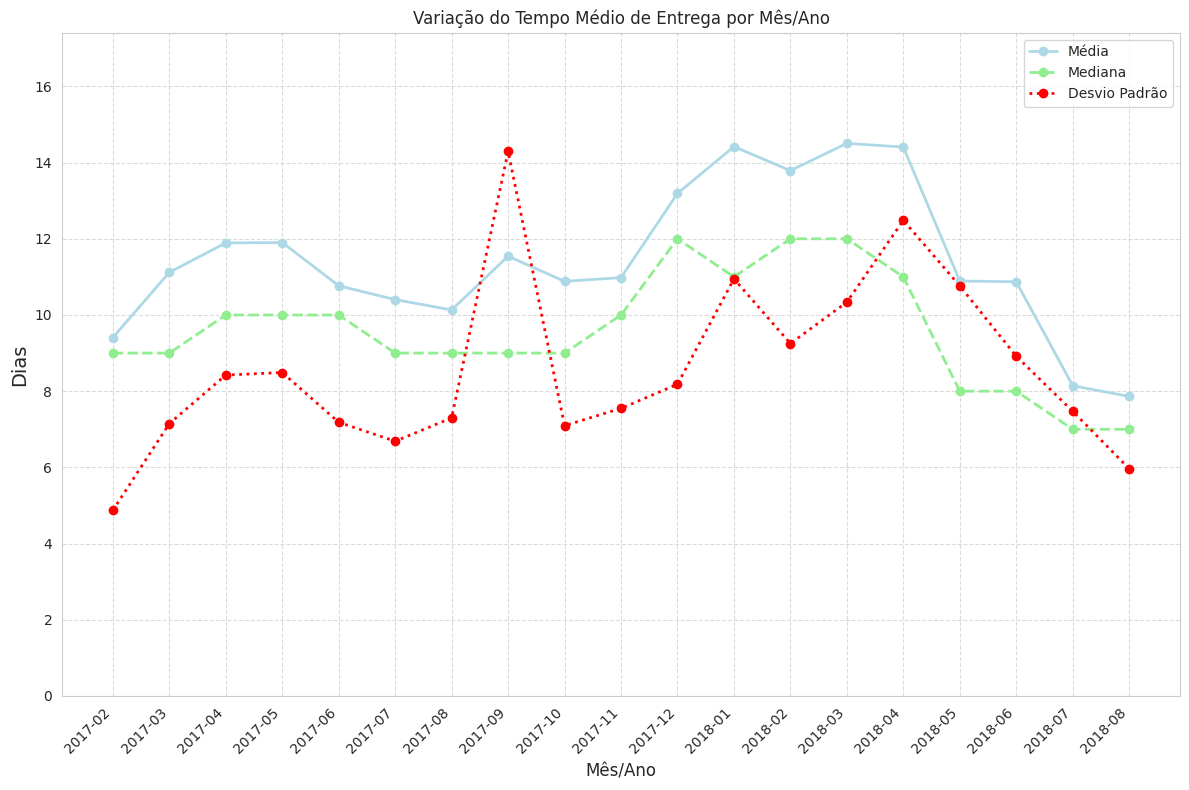

In [ ]:
# Certificar que a coluna de datas está no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Criar a coluna 'ano_mes' após a filtragem
pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')

# Agrupa por 'ano_mes' e calcula as estatísticas
estatisticas_por_mes = pedidos_df_filtrado.groupby('ano_mes')['tempo_entrega'].agg(['mean', 'median', 'std']).reset_index()

# Renomear colunas
estatisticas_por_mes.columns = ['Mês/Ano', 'Média (dias)', 'Mediana (dias)', 'Desvio Padrão (dias)']

# Configurar tamanho e estilo do gráfico
plt.figure(figsize=(12, 8))

# Plotar (Média, Mediana e Desvio Padrão) com ajustes de estilo
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Média (dias)'],
         label='Média', marker='o', color='lightblue', linewidth=2)
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Mediana (dias)'],
         label='Mediana', marker='o', color='lightgreen', linestyle='--', linewidth=2)
plt.plot(estatisticas_por_mes['Mês/Ano'].astype(str), estatisticas_por_mes['Desvio Padrão (dias)'],
         label='Desvio Padrão', marker='o', color='red', linestyle=':', linewidth=2)

# Adicionar título, eixos e ajustar as legendas
plt.title('Variação do Tempo Médio de Entrega por Mês/Ano', fontsize=12)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Dias', fontsize=14)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Melhorar a legenda e ajustar o layout
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar os limites de visualização (opcional)
plt.ylim(0, estatisticas_por_mes['Média (dias)'].max() * 1.2)

plt.tight_layout()
plt.show()


### 5.2 - Variação Mensal da quantidade de Pedidos Atrasados.

<ipython-input-145-b16e92a69399>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')
<ipython-input-145-b16e92a69399>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')


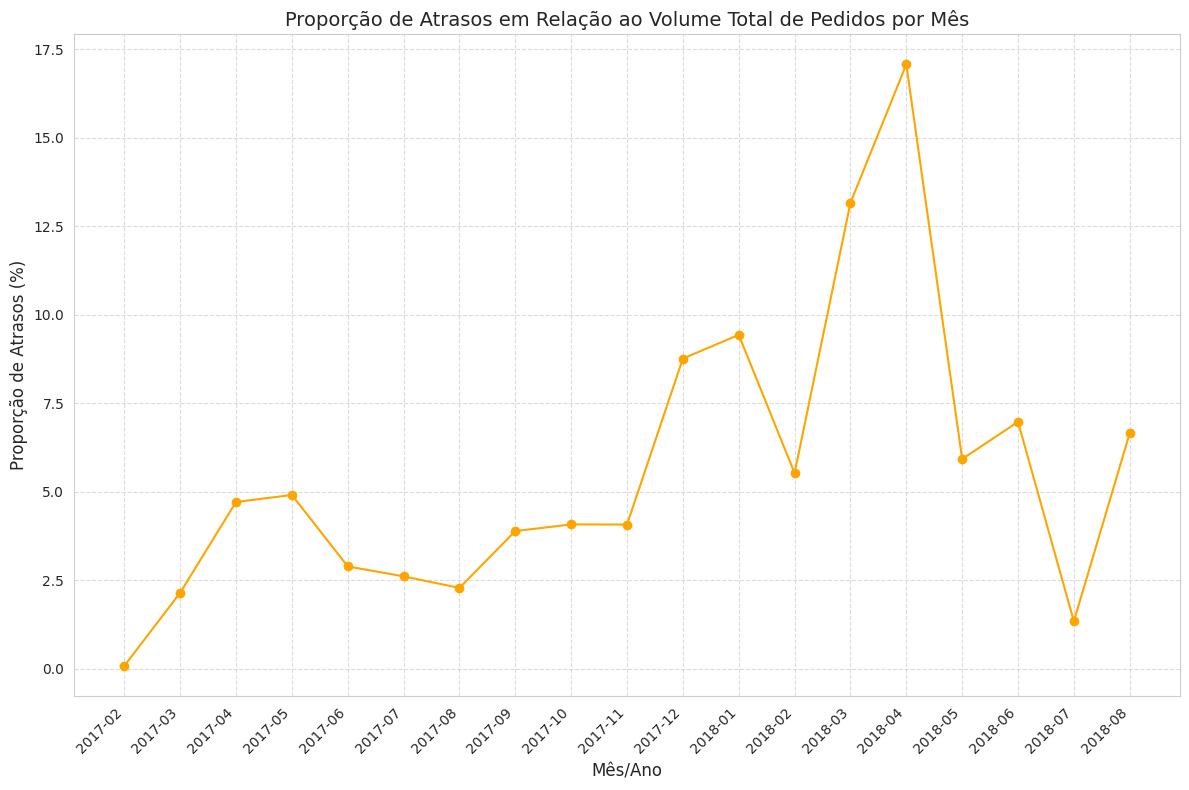

In [ ]:
# Certificar que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')

# Agrupar os pedidos por mês e contar o número de pedidos entregues
pedidos_por_mes = pedidos_df.groupby(pedidos_df['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')

# Definir a regra para meses válidos (exemplo: meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_df' para conter apenas os meses válidos
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Calcular o volume de pedidos por mês no DataFrame filtrado
pedidos_df_filtrado['ano_mes'] = pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')
volume_pedidos_por_mes = pedidos_df_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
volume_pedidos_por_mes.columns = ['Mês/Ano', 'Volume Total de Pedidos']

# Calcular a quantidade de atrasos por mês no DataFrame filtrado
pedidos_atrasados_filtrado = pedidos_df_filtrado[pedidos_df_filtrado['atraso_vs_estimativa'] > 0]
pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')
atrasos_por_mes = pedidos_atrasados_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
atrasos_por_mes.columns = ['Mês/Ano', 'Quantidade de Atrasos']

# Juntar os dois DataFrames (volume de pedidos e quantidade de atrasos)
analise_atrasos_por_mes = pd.merge(volume_pedidos_por_mes, atrasos_por_mes, on='Mês/Ano', how='left')
analise_atrasos_por_mes['Quantidade de Atrasos'] = analise_atrasos_por_mes['Quantidade de Atrasos'].fillna(0)

# Calcular a proporção de atrasos
analise_atrasos_por_mes['Proporção de Atrasos'] = analise_atrasos_por_mes['Quantidade de Atrasos'] / analise_atrasos_por_mes['Volume Total de Pedidos'] * 100

# Plotar o gráfico de proporção de atrasos por mês
plt.figure(figsize=(12, 8))
plt.plot(analise_atrasos_por_mes['Mês/Ano'].astype(str), analise_atrasos_por_mes['Proporção de Atrasos'], marker='o', color='orange')

# Adicionar título e rótulos dos eixos
plt.title('Proporção de Atrasos em Relação ao Volume Total de Pedidos por Mês', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Proporção de Atrasos (%)', fontsize=12)

# Rotacionar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


<ipython-input-146-4d86a0ad018f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')


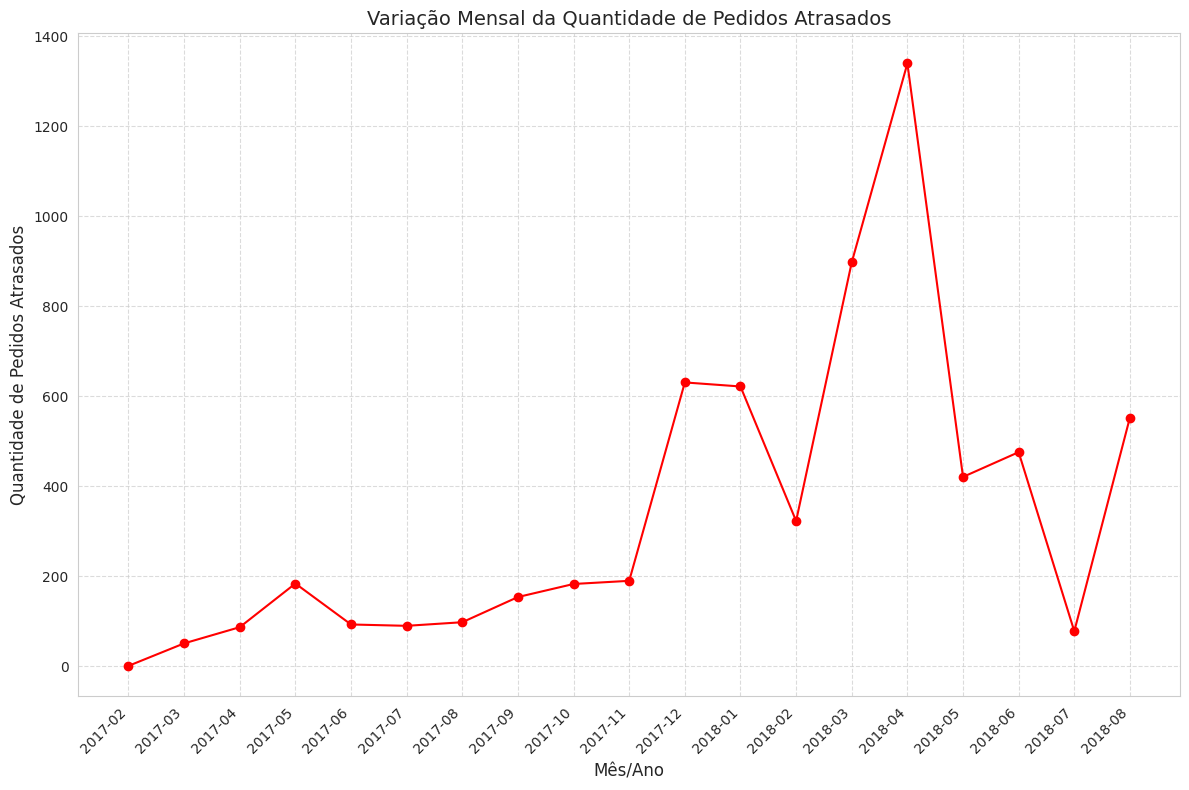

In [ ]:
# Certificar que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_estimated_delivery_date'] = pd.to_datetime(pedidos_df['order_estimated_delivery_date'], errors='coerce')

# Definir a regra para meses válidos (meses com mais de 300 pedidos)
meses_validos = pedidos_por_mes[pedidos_por_mes['num_pedidos'] >= 300]['order_delivered_customer_date'].astype(str).tolist()

# Filtrar o DataFrame 'pedidos_atrasados' para conter apenas os meses válidos
pedidos_atrasados_filtrado = pedidos_atrasados[pedidos_atrasados['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Gráfico de variação mensal da quantidade de pedidos atrasados com filtro aplicado
def plot_variacao_mensal_atrasos():
    # Criar uma nova coluna com o mês/ano de entrega no DataFrame filtrado
    pedidos_atrasados_filtrado['ano_mes'] = pedidos_atrasados_filtrado['order_delivered_customer_date'].dt.to_period('M')

    # Agrupar por mês/ano e contar a quantidade de pedidos atrasados no DataFrame filtrado
    atrasos_por_mes = pedidos_atrasados_filtrado.groupby('ano_mes')['order_id'].count().reset_index()
    atrasos_por_mes.columns = ['Mês/Ano', 'Quantidade de Atrasos']

    # Plotar o gráfico de linha da quantidade de atrasos por mês
    plt.figure(figsize=(12, 8))
    plt.plot(atrasos_por_mes['Mês/Ano'].astype(str), atrasos_por_mes['Quantidade de Atrasos'], marker='o', color='red')

    # Adicionar título e rótulos dos eixos
    plt.title('Variação Mensal da Quantidade de Pedidos Atrasados', fontsize=14)
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Pedidos Atrasados', fontsize=12)

    # Rotacionar os rótulos do eixo X para melhor legibilidade
    plt.xticks(rotation=45, ha='right')

    # Adicionar grade
    plt.grid(True, linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para exibir o gráfico
plot_variacao_mensal_atrasos()


# VI - Churn


### 6.1 - Cálculo da taxa de churn


In [ ]:
# Prepara o DataFrame
pedidos_clientes_df = pd.merge(
    pedidos_df[['order_id', 'customer_id', 'order_purchase_timestamp']],
    clientes_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Calcular a quantidade de pedidos por cliente
qtde_pedidos_por_cliente = pedidos_clientes_df.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Definir churn como clientes que não fizeram novos pedidos após um determinado período
pedidos_clientes_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_clientes_df['order_purchase_timestamp'])
pedidos_clientes_df['ano_mes'] = pedidos_clientes_df['order_purchase_timestamp'].dt.to_period('M')

# Calcular churn para cada compra subsequente
churn_por_compra = []
for i in range(1, 8):
    # Contar o número de clientes que fizeram exatamente 'i' pedidos
    total_clientes_i_pedidos = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] == i]['customer_unique_id'].nunique()

    # Contar o número de clientes que fizeram pelo menos 'i' pedidos
    total_clientes_ate_i_pedidos = qtde_pedidos_por_cliente[qtde_pedidos_por_cliente['qtde_pedidos'] >= i]['customer_unique_id'].nunique()

    # Calcular a taxa de churn para clientes com 'i' pedidos
    if total_clientes_ate_i_pedidos > 0:
        churn = total_clientes_i_pedidos / total_clientes_ate_i_pedidos
    else:
        churn = 0

    churn_por_compra.append((i, churn, total_clientes_i_pedidos, total_clientes_ate_i_pedidos))

# Exibir a taxa de churn por compra
for i, churn, total_clientes_i_pedidos, total_clientes_ate_i_pedidos in churn_por_compra:
    print(f"Taxa de Churn após {i}ª compra: {churn:.2%} (Clientes que fizeram {i} pedidos: {total_clientes_i_pedidos}, Clientes que fizeram pelo menos {i} pedidos: {total_clientes_ate_i_pedidos})")


Taxa de Churn após 1ª compra: 96.88% (Clientes que fizeram 1 pedidos: 93099, Clientes que fizeram pelo menos 1 pedidos: 96096)
Taxa de Churn após 2ª compra: 91.59% (Clientes que fizeram 2 pedidos: 2745, Clientes que fizeram pelo menos 2 pedidos: 2997)
Taxa de Churn após 3ª compra: 80.56% (Clientes que fizeram 3 pedidos: 203, Clientes que fizeram pelo menos 3 pedidos: 252)
Taxa de Churn após 4ª compra: 61.22% (Clientes que fizeram 4 pedidos: 30, Clientes que fizeram pelo menos 4 pedidos: 49)
Taxa de Churn após 5ª compra: 42.11% (Clientes que fizeram 5 pedidos: 8, Clientes que fizeram pelo menos 5 pedidos: 19)
Taxa de Churn após 6ª compra: 54.55% (Clientes que fizeram 6 pedidos: 6, Clientes que fizeram pelo menos 6 pedidos: 11)
Taxa de Churn após 7ª compra: 60.00% (Clientes que fizeram 7 pedidos: 3, Clientes que fizeram pelo menos 7 pedidos: 5)


### 6.2 - Gráfico do Churn para compras conseguintes

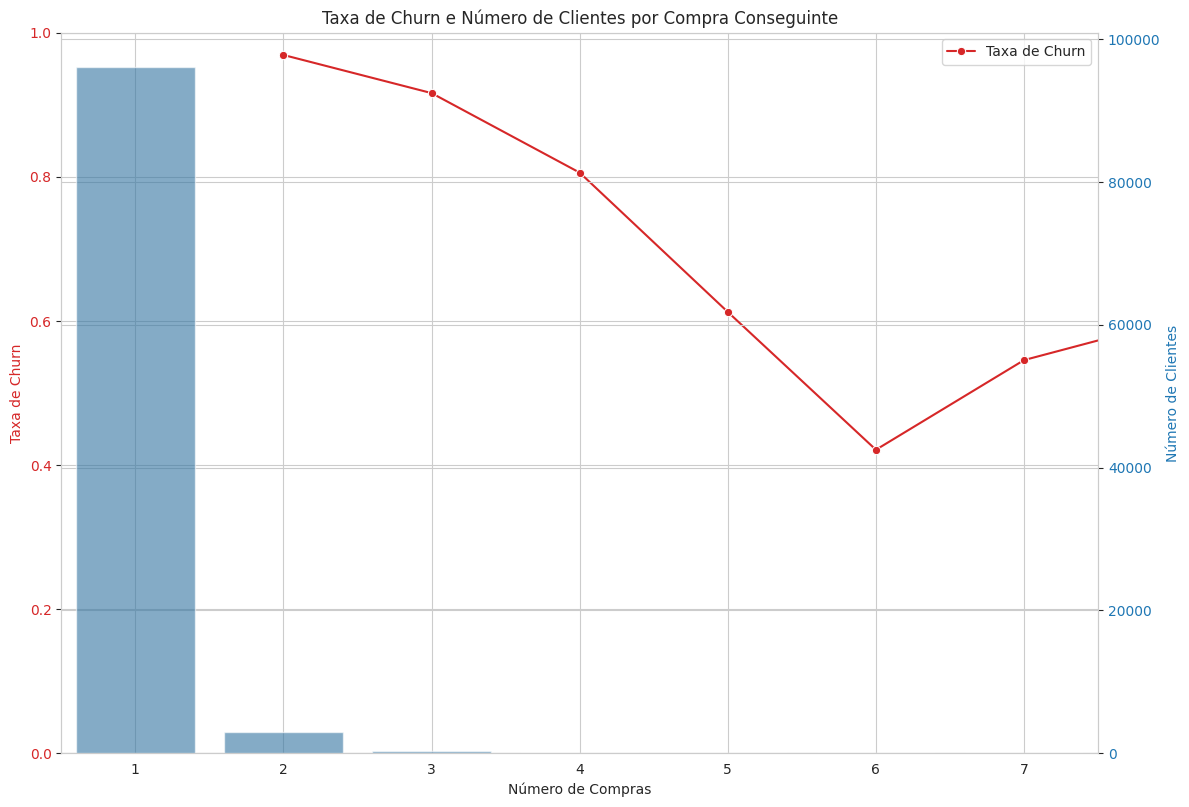

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

compras = [x[0] for x in churn_por_compra]
churn_rates = [x[1] for x in churn_por_compra]
total_clientes = [x[3] for x in churn_por_compra]

fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('Número de Compras')
ax1.set_ylabel('Taxa de Churn', color=color)
sns.lineplot(x=compras, y=churn_rates, color=color, marker='o', ax=ax1, label='Taxa de Churn')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Número de Clientes', color=color)
sns.barplot(x=compras, y=total_clientes, color=color, alpha=0.6, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Taxa de Churn e Número de Clientes por Compra Conseguinte')
plt.show()


# VII - Panorama Geral Clientes



## 6.1 - Segmentação dos Clientes em 4 grupos distintos de acordo com o Churn


### 6.1.2 - Definição dos Grupos:


- clientes_novos: (1 compra);

- clientes_recorrentes_1 (2 compras);

- clientes_recorrentes_2 (3 a 5 compras);

- clientes_recorrentes_3 (5+ compras);


### 6.1.3 - Preparação dos dataframes

In [ ]:
# Inner join entre 'pedidos_df' e 'clientes_df' utilizando 'customer_id'
pedidos_clientes_df = pd.merge(
    pedidos_df[['order_id', 'customer_id']],
    clientes_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Utilizar 'customer_unique_id' para os próximos merges e análises com 'itens_pedidos_df'
pedidos_completos_df = pd.merge(
    pedidos_clientes_df[['order_id', 'customer_unique_id']],
    itens_pedidos_df[['order_id']],
    on='order_id',
    how='inner'
)

# Join com a tabela de pagamentos 'pagamentos_df' para trazer o valor do pagamento
pedidos_completos_com_pagamento = pd.merge(
    pedidos_completos_df,
    pagamentos_df[['order_id', 'payment_value']],
    on='order_id',
    how='inner'
)

# Calcular a quantidade de pedidos por cliente
qtde_pedidos_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Definir os grupos de clientes com base na quantidade de pedidos
definir_grupo = lambda qtde_pedidos: 'Novos' if qtde_pedidos == 1 else 'Recorrentes_1' if qtde_pedidos == 2 else 'Recorrentes_2' if qtde_pedidos == 3 else 'Recorrentes_3'
qtde_pedidos_por_cliente['grupo_cliente'] = qtde_pedidos_por_cliente['qtde_pedidos'].apply(definir_grupo)

# Calcula o total de pagamento por cliente
total_pagamento_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id').agg(
    total_pagamento=('payment_value', 'sum')
).reset_index()

# Une a quantidade de pedidos e total de pagamento por cliente
dados_clientes = pd.merge(
    qtde_pedidos_por_cliente,
    total_pagamento_por_cliente,
    on='customer_unique_id',
    how='inner'
)

# Calcular o ticket médio por cliente
dados_clientes['ticket_medio'] = dados_clientes['total_pagamento'] / dados_clientes['qtde_pedidos']

# Calcular o ticket médio para cada grupo
ticket_medio_por_grupo = dados_clientes.groupby('grupo_cliente').agg(
    ticket_medio_grupo=('ticket_medio', 'mean'),
    numero_clientes=('customer_unique_id', 'count')
).reset_index()

# Ordenar os grupos na ordem desejada
ordem_grupos = ['Novos', 'Recorrentes_1', 'Recorrentes_2', 'Recorrentes_3']
ticket_medio_por_grupo['grupo_cliente'] = pd.Categorical(ticket_medio_por_grupo['grupo_cliente'], categories=ordem_grupos, ordered=True)
ticket_medio_por_grupo = ticket_medio_por_grupo.sort_values('grupo_cliente')

# Calcular o tempo de entrega para cada pedido (dias entre a data de compra e a data de entrega)
pedidos_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_df['order_purchase_timestamp'])
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'])
pedidos_df['tempo_entrega'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_purchase_timestamp']).dt.days

# Criar coluna 'ano_mes' com ano e mês de 'order_purchase_timestamp'
pedidos_df['ano_mes'] = pedidos_df['order_purchase_timestamp'].dt.to_period('M')

# Unir 'pedidos_completos_com_pagamento' com 'pedidos_df' para obter o tempo de entrega e 'ano_mes'
pedidos_completos = pd.merge(
    pedidos_completos_com_pagamento,
    pedidos_df[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'tempo_entrega', 'ano_mes']],
    on='order_id',
    how='inner'
)

# Unir 'pedidos_completos' com 'qtde_pedidos_por_cliente' para obter 'grupo_cliente'
pedidos_completos = pd.merge(
    pedidos_completos,
    qtde_pedidos_por_cliente[['customer_unique_id', 'grupo_cliente']],
    on='customer_unique_id',
    how='inner'
)

# Calcular o tempo médio de entrega e a receita total por cliente
tempo_entrega_e_receita_por_cliente = pedidos_completos.groupby('customer_unique_id').agg(
    tempo_medio_entrega=('tempo_entrega', 'mean'),
    receita_total=('payment_value', 'sum'),
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Unir com os grupos de clientes
tempo_entrega_e_receita_por_cliente = pd.merge(
    tempo_entrega_e_receita_por_cliente,
    qtde_pedidos_por_cliente[['customer_unique_id', 'grupo_cliente']],
    on='customer_unique_id',
    how='inner'
)

### 6.2 - Gráfico do Tempo médio de Entrega vs Receita total por grupo de Cliente

Correlação entre tempo médio de entrega e receita total: 0.07


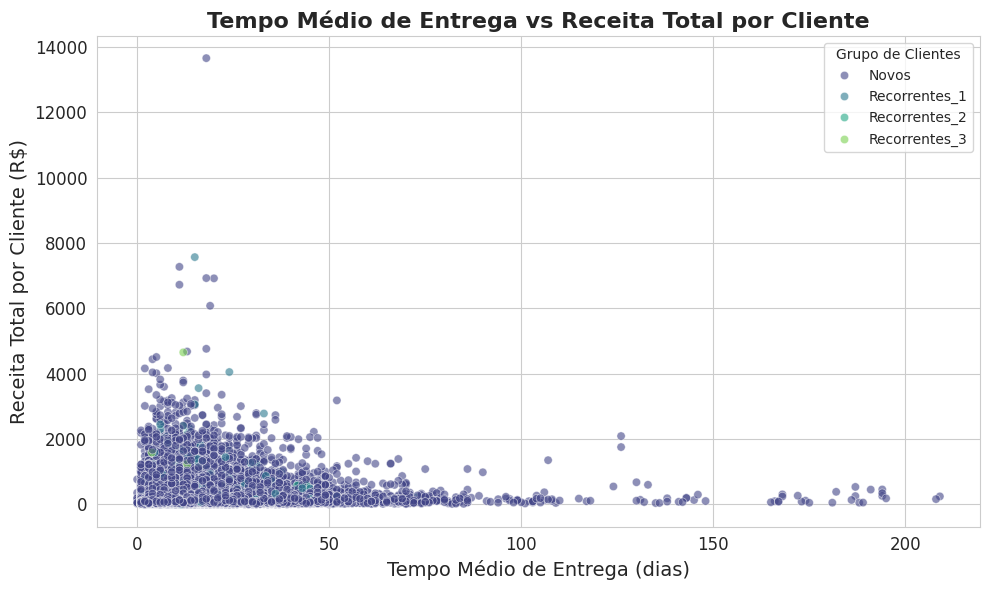

In [ ]:
# Analisar a correlação entre tempo médio de entrega e receita total
correlacao = tempo_entrega_e_receita_por_cliente['tempo_medio_entrega'].corr(tempo_entrega_e_receita_por_cliente['receita_total'])
print(f"Correlação entre tempo médio de entrega e receita total: {correlacao:.2f}")

# Criar um gráfico de dispersão mostrando o tempo médio de entrega versus a receita total por cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tempo_medio_entrega',
    y='receita_total',
    hue='grupo_cliente',
    data=tempo_entrega_e_receita_por_cliente,
    palette='viridis',
    alpha=0.6
)

# Personalizar os rótulos e título
plt.xlabel('Tempo Médio de Entrega (dias)', fontsize=14)
plt.ylabel('Receita Total por Cliente (R$)', fontsize=14)
plt.title('Tempo Médio de Entrega vs Receita Total por Cliente', fontsize=16, fontweight='bold')
plt.legend(title='Grupo de Clientes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

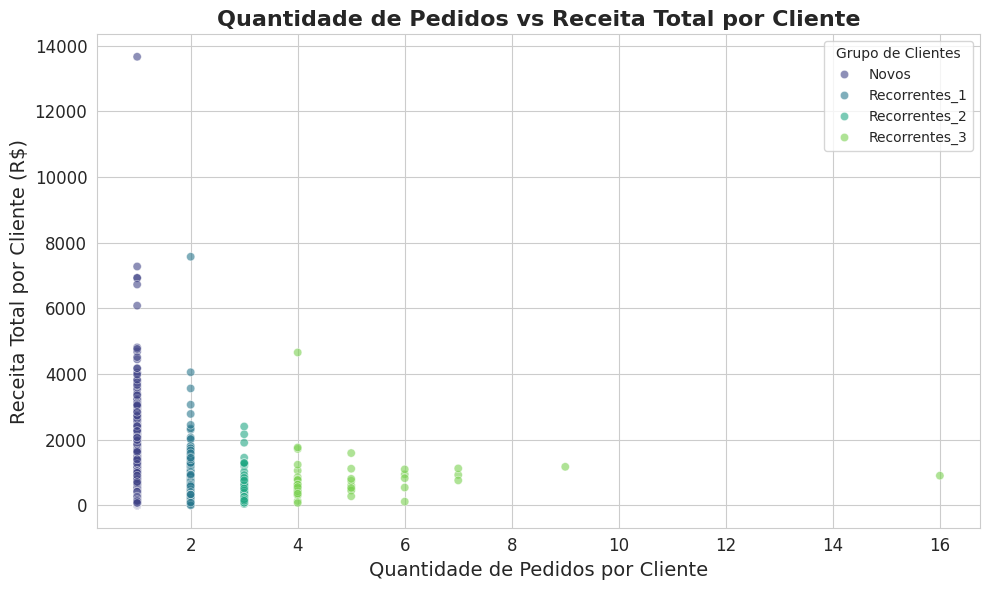

In [ ]:
# Criar um gráfico de dispersão mostrando o número de pedidos por cliente versus a receita ao longo do tempo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='qtde_pedidos',
    y='receita_total',
    hue='grupo_cliente',
    data=tempo_entrega_e_receita_por_cliente,
    palette='viridis',
    alpha=0.6
)

# Personalizar os rótulos e título
plt.xlabel('Quantidade de Pedidos por Cliente', fontsize=14)
plt.ylabel('Receita Total por Cliente (R$)', fontsize=14)
plt.title('Quantidade de Pedidos vs Receita Total por Cliente', fontsize=16, fontweight='bold')
plt.legend(title='Grupo de Clientes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 6.3 - Migração de clientes entre grupos ao longo do tempo

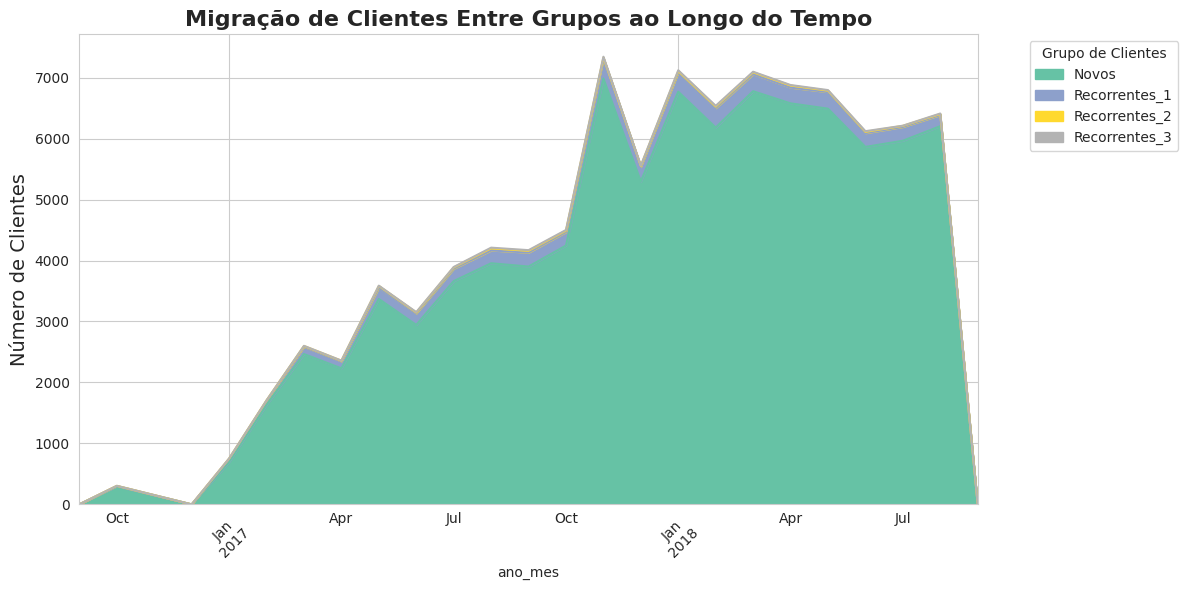

In [ ]:
# Contar o número de clientes em cada grupo por período
clientes_por_grupo_periodo = pedidos_completos.groupby(['ano_mes', 'grupo_cliente']).agg(
    numero_clientes=('customer_unique_id', 'nunique')
).reset_index()


# Criar a tabela pivot para visualização
clientes_por_grupo_pivot = clientes_por_grupo_periodo.pivot(
    index='ano_mes',
    columns='grupo_cliente',
    values='numero_clientes'
).fillna(0)

# Plotar o gráfico de área para visualizar a migração entre grupos
clientes_por_grupo_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='Set2')

plt.ylabel('Número de Clientes', fontsize=14)
plt.title('Migração de Clientes Entre Grupos ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Grupo de Clientes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 6.4 - Ticket médio por grupo de clientes

In [ ]:
# Inner join entre 'pedidos_df' e 'clientes_df' utilizando 'customer_id'
pedidos_clientes_df = pd.merge(
    pedidos_df[['order_id', 'customer_id']],
    clientes_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Utilizar 'customer_unique_id' para os próximos merges e análises com 'itens_pedidos_df'
pedidos_completos_df = pd.merge(
    pedidos_clientes_df[['order_id', 'customer_unique_id']],
    itens_pedidos_df[['order_id']],
    on='order_id',
    how='inner'
)

# Join com a tabela de pagamentos 'pagamentos_df' para trazer o valor do pagamento
pedidos_completos_com_pagamento = pd.merge(
    pedidos_completos_df,
    pagamentos_df[['order_id', 'payment_value']],
    on='order_id',
    how='inner'
)

# Calcular a quantidade de pedidos por cliente
qtde_pedidos_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Definir os grupos de clientes com base na quantidade de pedidos
def definir_grupo(qtde_pedidos):
    if qtde_pedidos == 1:
        return 'Novos'
    elif qtde_pedidos == 2:
        return 'Recorrentes_1'
    elif qtde_pedidos == 3:
        return 'Recorrentes_2'
    else:
        return 'Recorrentes_3'

qtde_pedidos_por_cliente['grupo_cliente'] = qtde_pedidos_por_cliente['qtde_pedidos'].apply(definir_grupo)

# Exibir as primeiras linhas para verificar
print(qtde_pedidos_por_cliente.head(3))

                 customer_unique_id  qtde_pedidos grupo_cliente
0  0000366f3b9a7992bf8c76cfdf3221e2             1         Novos
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1         Novos
2  0000f46a3911fa3c0805444483337064             1         Novos


   grupo_cliente  ticket_medio_grupo  numero_clientes
0          Novos          158.867866            92506
1  Recorrentes_1          144.086061             2673
2  Recorrentes_2          141.970174              192
3  Recorrentes_3          165.636111               48


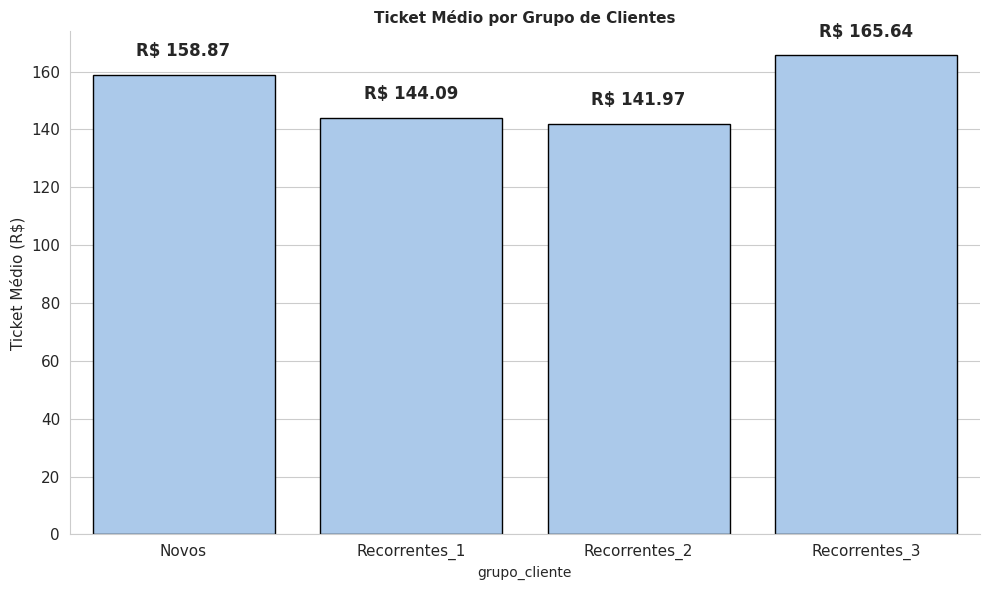

In [ ]:
# Calcula o total de pagamento por cliente
total_pagamento_por_cliente = pedidos_completos_com_pagamento.groupby('customer_unique_id').agg(
    total_pagamento=('payment_value', 'sum')
).reset_index()

# 2. Une a quantidade de pedidos e total de pagamento por cliente
dados_clientes = pd.merge(
    qtde_pedidos_por_cliente,
    total_pagamento_por_cliente,
    on='customer_unique_id',
    how='inner'
)

#  Calcular o ticket médio por cliente
dados_clientes['ticket_medio'] = dados_clientes['total_pagamento'] / dados_clientes['qtde_pedidos']

#  Calcular o ticket médio para cada grupo
ticket_medio_por_grupo = dados_clientes.groupby('grupo_cliente').agg(
    ticket_medio_grupo=('ticket_medio', 'mean'),
    numero_clientes=('customer_unique_id', 'count')
).reset_index()

# 5. Ordenar os grupos na ordem desejada
ordem_grupos = ['Novos', 'Recorrentes_1', 'Recorrentes_2', 'Recorrentes_3']
ticket_medio_por_grupo['grupo_cliente'] = pd.Categorical(ticket_medio_por_grupo['grupo_cliente'], categories=ordem_grupos, ordered=True)
ticket_medio_por_grupo = ticket_medio_por_grupo.sort_values('grupo_cliente')

# 6. Exibir o DataFrame resultante
print(ticket_medio_por_grupo)

# 7. Configurar o estilo do Seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Criar um gráfico aprimorado mostrando o ticket médio entre os grupos
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='grupo_cliente',
    y='ticket_medio_grupo',
    data=ticket_medio_por_grupo,
    order=ordem_grupos,
    edgecolor='black'
)

# 9. Adicionar os valores acima de cada barra
for i, row in ticket_medio_por_grupo.iterrows():
    ax.text(
        i,
        row.ticket_medio_grupo + 5,  # Ajuste este valor conforme necessário
        f"R$ {row.ticket_medio_grupo:,.2f}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='semibold'
    )

# Personalizar os rótulos e títulos
plt.ylabel('Ticket Médio (R$)', fontsize=11)
plt.title('Ticket Médio por Grupo de Clientes', fontsize=11, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

sns.despine(top=True, right=True)

plt.tight_layout()

plt.show()


# VIII - Matrix de Correlação

Quantidade de product_id em itens_pedidos_df que não possuem correspondência em produtos_df: 6
Valores nulos por coluna no DataFrame resultante:
order_id          0
customer_id       0
               ... 
delay_days     3397
month             0
Length: 23, dtype: int64


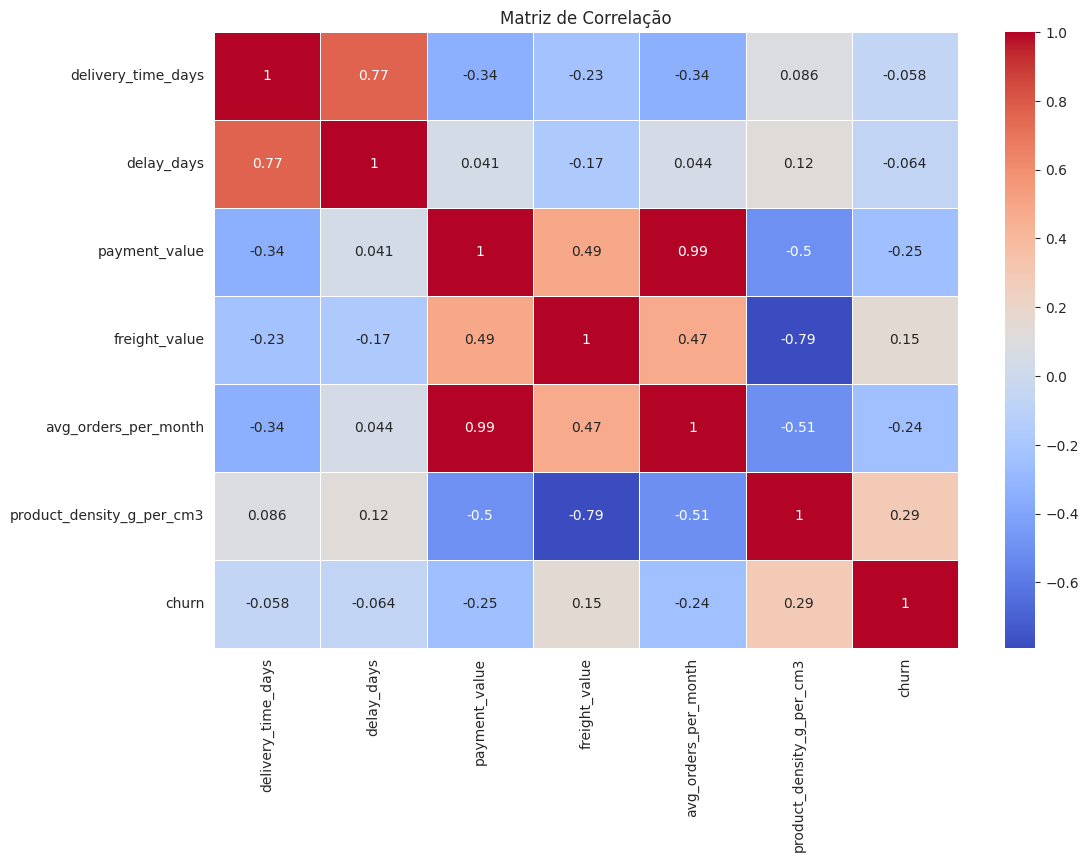

Métricas mensais:
      month  delivery_time_days  delay_days  payment_value  \
0   2016-09           54.000000   36.000000         388.47   
1   2016-10           19.738095  -36.017857       76120.17   
..      ...                 ...         ...            ...   
23  2018-09                 NaN         NaN        4439.54   
24  2018-10                 NaN         NaN         589.67   

    product_volume_cm3  product_weight_g  order_id  freight_value  \
0              24290.0            6900.0         7      14.565000   
1            6689685.0          870641.0       397      19.967979   
..                 ...               ...       ...            ...   
23             34816.0           10400.0        16      21.460000   
24                 0.0               0.0         4            NaN   

    avg_orders_per_month  product_density_g_per_cm3   churn  
0                      7                   0.284068     0.0  
1                    397                   0.130147     0.0  
..      

In [ ]:
# Inner join entre 'pedidos_df' e 'clientes_df' utilizando 'customer_id'
pedidos_clientes_df = pd.merge(
    pedidos_df[['order_id', 'customer_id', 'order_purchase_timestamp']],
    clientes_df[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Calcular a quantidade de pedidos por cliente
qtde_pedidos_por_cliente = pedidos_clientes_df.groupby('customer_unique_id').agg(
    qtde_pedidos=('order_id', 'count')
).reset_index()

# Definir churn como clientes que não fizeram novos pedidos após um determinado período
pedidos_clientes_df['order_purchase_timestamp'] = pd.to_datetime(pedidos_clientes_df['order_purchase_timestamp'])
pedidos_clientes_df['ano_mes'] = pedidos_clientes_df['order_purchase_timestamp'].dt.to_period('M')

# Calcular churn mensal
churn_mensal = pedidos_clientes_df.groupby('ano_mes')['customer_unique_id'].nunique().diff().fillna(0)
churn_mensal = churn_mensal.apply(lambda x: abs(x) if x < 0 else 0)

# Convertendo códigos postais e IDs para strings, e garantindo consistência
clientes_df['customer_zip_code_prefix'] = clientes_df['customer_zip_code_prefix'].astype(str).str.strip().str.lower()
vendedores_df['seller_zip_code_prefix'] = vendedores_df['seller_zip_code_prefix'].astype(str).str.strip().str.lower()
itens_pedidos_df['product_id'] = itens_pedidos_df['product_id'].astype(str).str.strip().str.lower()
produtos_df['product_id'] = produtos_df['product_id'].astype(str).str.strip().str.lower()

# Calculando o tamanho cúbico dos produtos e adicionando como uma nova coluna
produtos_df['product_volume_cm3'] = produtos_df['product_length_cm'] * produtos_df['product_height_cm'] * produtos_df['product_width_cm']

# Tratando valores de peso e volume zerados para evitar divisão por zero
produtos_df = produtos_df[(produtos_df['product_weight_g'] > 0) & (produtos_df['product_volume_cm3'] > 0)].copy()

# Calculando a densidade dos produtos (peso / volume) e adicionando como uma nova coluna
produtos_df['product_density_g_per_cm3'] = produtos_df['product_weight_g'] / produtos_df['product_volume_cm3']

# Unindo itens_pedidos_df com produtos_df para trazer informações dos produtos
itens_pedidos_produtos_df = itens_pedidos_df.merge(
    produtos_df[['product_id', 'product_weight_g', 'product_volume_cm3']],
    on='product_id',
    how='left'
)

# Verificando se todos os product_id em itens_pedidos_df têm correspondência em produtos_df
produtos_nao_correspondentes = itens_pedidos_df[~itens_pedidos_df['product_id'].isin(produtos_df['product_id'])]
print(f"Quantidade de product_id em itens_pedidos_df que não possuem correspondência em produtos_df: {produtos_nao_correspondentes['product_id'].nunique()}")

# Unindo pedidos_df com itens_pedidos_produtos_df para trazer as informações dos itens do pedido
pedidos_itens_df = pedidos_df.merge(
    itens_pedidos_produtos_df,
    on='order_id',
    how='left'
)

# Unindo pedidos_itens_df com pagamentos_df para trazer as informações dos pagamentos
pedidos_itens_pagamentos_df = pedidos_itens_df.merge(
    pagamentos_df[['order_id', 'payment_value', 'payment_installments']],
    on='order_id',
    how='left'
)

# Unindo pedidos_itens_pagamentos_df com clientes_df para trazer informações dos clientes
pedidos_completo_df = pedidos_itens_pagamentos_df.merge(
    clientes_df[['customer_id', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
)

# Unindo pedidos_completo_df com vendedores_df para trazer informações dos vendedores
pedidos_completo_df = pedidos_completo_df.merge(
    vendedores_df[['seller_id', 'seller_zip_code_prefix']],
    on='seller_id',
    how='left'
)

# Calculando o tempo de entrega em dias
df_completo_com_tempo = pedidos_completo_df.copy()
df_completo_com_tempo['order_delivered_customer_date'] = pd.to_datetime(df_completo_com_tempo['order_delivered_customer_date'])
df_completo_com_tempo['order_purchase_timestamp'] = pd.to_datetime(df_completo_com_tempo['order_purchase_timestamp'])
df_completo_com_tempo['order_estimated_delivery_date'] = pd.to_datetime(df_completo_com_tempo['order_estimated_delivery_date'])

# Tempo de entrega em dias
df_completo_com_tempo['delivery_time_days'] = (df_completo_com_tempo['order_delivered_customer_date'] - df_completo_com_tempo['order_purchase_timestamp']).dt.days

# Tempo de atraso em dias
df_completo_com_tempo['delay_days'] = (df_completo_com_tempo['order_delivered_customer_date'] - df_completo_com_tempo['order_estimated_delivery_date']).dt.days

# Criando uma coluna com o mês do pedido
df_completo_com_tempo['month'] = df_completo_com_tempo['order_purchase_timestamp'].dt.to_period('M')

# Agrupando por mês e calculando as métricas
monthly_metrics = df_completo_com_tempo.groupby('month').agg({
    'delivery_time_days': 'mean',
    'delay_days': 'mean',
    'payment_value': 'sum',
    'product_volume_cm3': 'sum',
    'product_weight_g': 'sum',
    'order_id': 'count',
    'freight_value': 'mean'
}).reset_index()

# Calculando a média de pedidos por mês
monthly_metrics['avg_orders_per_month'] = monthly_metrics['order_id']

# Calculando a densidade média por mês
monthly_metrics['product_density_g_per_cm3'] = monthly_metrics['product_weight_g'] / monthly_metrics['product_volume_cm3']

# Adicionando o churn mensal ao DataFrame de métricas mensais
monthly_metrics = monthly_metrics.set_index('month').join(churn_mensal.rename('churn')).reset_index()

# Substituindo o DataFrame original pelo atualizado
pedidos_completo_df = df_completo_com_tempo

# Verificando valores nulos no DataFrame resultante
print("Valores nulos por coluna no DataFrame resultante:")
print(pedidos_completo_df.isnull().sum())

# Removendo pedidos que possuem informações incompletas
pedidos_completo_df = pedidos_completo_df.dropna()

# Selecionando apenas colunas numéricas do DataFrame de métricas mensais para calcular a correlação, excluindo variáveis óbvias ou redundantes
monthly_metrics_numeric = monthly_metrics.drop(columns=['order_id', 'product_volume_cm3', 'product_weight_g']).select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação com métricas mensais
correlation_matrix = monthly_metrics_numeric.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Exibindo as métricas mensais
print("Métricas mensais:")
print(monthly_metrics)


Correlação entre volume de pedidos e tempo médio de entrega: 0.25


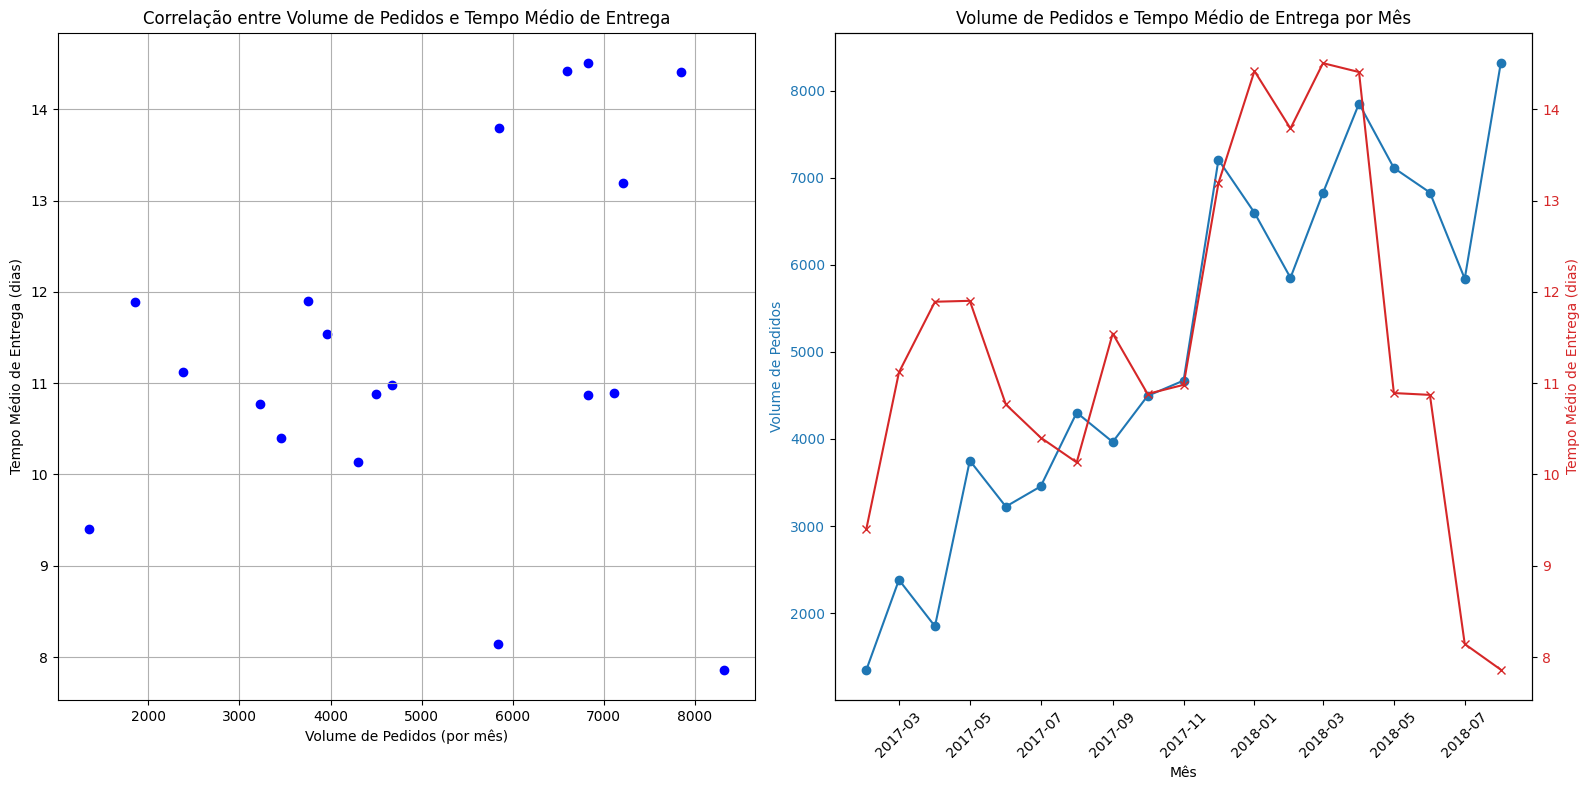

In [ ]:
# Certifica que as colunas de datas estão no formato datetime
pedidos_df['order_delivered_customer_date'] = pd.to_datetime(pedidos_df['order_delivered_customer_date'], errors='coerce')
pedidos_df['order_approved_at'] = pd.to_datetime(pedidos_df['order_approved_at'], errors='coerce')

# Calcular o tempo de entrega (dias entre aprovação e entrega)
pedidos_df['tempo_entrega'] = (pedidos_df['order_delivered_customer_date'] - pedidos_df['order_approved_at']).dt.days

# Filtrar os meses válidos (se já tiver sido feito, esta etapa pode ser ignorada)
pedidos_df_filtrado = pedidos_df[pedidos_df['order_delivered_customer_date'].dt.to_period('M').astype(str).isin(meses_validos)]

# Calcular o volume de pedidos e o tempo médio de entrega por mês
volume_pedidos_por_mes = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M')).size().reset_index(name='num_pedidos')
tempo_medio_por_mes = pedidos_df_filtrado.groupby(pedidos_df_filtrado['order_delivered_customer_date'].dt.to_period('M'))['tempo_entrega'].mean().reset_index(name='tempo_medio_entrega')

# Juntar os dois DataFrames (volume de pedidos e tempo médio de entrega) para fazer a correlação
analise_por_mes = pd.merge(volume_pedidos_por_mes, tempo_medio_por_mes, on='order_delivered_customer_date')

# Calcular a correlação entre volume de pedidos e tempo médio de entrega
correlacao = analise_por_mes['num_pedidos'].corr(analise_por_mes['tempo_medio_entrega'])
print(f"Correlação entre volume de pedidos e tempo médio de entrega: {correlacao:.2f}")

# Converter a coluna 'order_delivered_customer_date' para datetime para facilitar a visualização no gráfico
analise_por_mes['order_delivered_customer_date'] = analise_por_mes['order_delivered_customer_date'].dt.to_timestamp()

# Criar a figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Primeiro gráfico: Dispersão (Correlação entre Volume e Tempo Médio de Entrega)
ax1.scatter(analise_por_mes['num_pedidos'], analise_por_mes['tempo_medio_entrega'], color='blue')
ax1.set_title('Correlação entre Volume de Pedidos e Tempo Médio de Entrega')
ax1.set_xlabel('Volume de Pedidos (por mês)')
ax1.set_ylabel('Tempo Médio de Entrega (dias)')
ax1.grid(True)

# Segundo gráfico: Linhas (Volume de Pedidos e Tempo Médio de Entrega)
color = 'tab:blue'
ax2.set_xlabel('Mês')
ax2.set_ylabel('Volume de Pedidos', color=color)
ax2.plot(analise_por_mes['order_delivered_customer_date'], analise_por_mes['num_pedidos'], color=color, marker='o', label='Volume de Pedidos')
ax2.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

ax3 = ax2.twinx()  # Criar um segundo eixo y que compartilha o mesmo eixo x
color = 'tab:red'
ax3.set_ylabel('Tempo Médio de Entrega (dias)', color=color)
ax3.plot(analise_por_mes['order_delivered_customer_date'], analise_por_mes['tempo_medio_entrega'], color=color, marker='x', label='Tempo Médio de Entrega')
ax3.tick_params(axis='y', labelcolor=color)

ax2.set_title('Volume de Pedidos e Tempo Médio de Entrega por Mês')

# Ajustar o layout
plt.tight_layout()
plt.show()
